In [126]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def custom_transform(padding=(0,0)):
    """
    padding[0] is the height
    padding[1] is the width
    """
    custom = transforms.Compose([
                        transforms.Pad(padding, fill=0),
                        transforms.Resize((90, 160)),
                        transforms.ToTensor(),
                        transforms.Normalize([0.5, 0.5, 0.5],
                                            [0.5, 0.5, 0.5])])
    return custom

In [127]:


def collate_function(batch):
    samples = [sample[0] for sample in batch]
    labels = [sample[1] for sample in batch]
    images = []
    for image in samples:
        print(image.width)
        print(image.height)
        ratio = image.width/image.height
        if 16/9 -0.03<= ratio <= 16/9 +0.03:
            transform = custom_transform()
            image = transform(image)
        elif ratio > 16/9:
                x = int((9/16*image.width - image.height)/2)
                transform = custom_transform((0,x))
                image = transform(image)
        elif ratio < 16/9:
                x = int((16/9*image.height-image.width)/2)
                transform = custom_transform((x,0))
                image = transform(image)
        print(image.shape)
        print(image.shape[2]/image.shape[1])
        images.append(image)
        
        return images, torch.tensor(labels)
        

In [128]:
16/9

1.7777777777777777

In [129]:
dataset = datasets.ImageFolder("datasets/cat_vs_dog/train/")

In [135]:
loader = DataLoader(dataset, collate_fn=collate_function, shuffle=True)

In [131]:
iterator = iter(loader)


In [132]:
images, label = next(iterator)

500
374
torch.Size([3, 90, 160])
1.7777777777777777


In [51]:
ls datasets/cat_vs_dog/train/cat/

cat.0.jpg      cat.12239.jpg  cat.3247.jpg   cat.5505.jpg   cat.7760.jpg
cat.1.jpg      cat.1224.jpg   cat.3248.jpg   cat.5507.jpg   cat.7761.jpg
cat.10.jpg     cat.12240.jpg  cat.3249.jpg   cat.5508.jpg   cat.7762.jpg
cat.100.jpg    cat.12241.jpg  cat.325.jpg    cat.551.jpg    cat.7763.jpg
cat.1000.jpg   cat.12242.jpg  cat.3250.jpg   cat.5511.jpg   cat.7764.jpg
cat.10000.jpg  cat.12243.jpg  cat.3251.jpg   cat.5513.jpg   cat.7765.jpg
cat.10001.jpg  cat.12244.jpg  cat.3252.jpg   cat.5514.jpg   cat.7766.jpg
cat.10002.jpg  cat.12245.jpg  cat.3253.jpg   cat.5515.jpg   cat.7767.jpg
cat.10003.jpg  cat.12246.jpg  cat.3254.jpg   cat.5516.jpg   cat.7768.jpg
cat.10004.jpg  cat.12247.jpg  cat.3255.jpg   cat.5517.jpg   cat.7769.jpg
cat.10005.jpg  cat.12248.jpg  cat.3256.jpg   cat.5518.jpg   cat.777.jpg
cat.10006.jpg  cat.12249.jpg  cat.3257.jpg   cat.5519.jpg   cat.7770.jpg
cat.10007.jpg  cat.1225.jpg   cat.3258.jpg   cat.552.jpg    cat.7771.jpg
cat.10008.jpg  cat.12250.jpg  cat.326.jpg    cat.552

cat.11964.jpg  cat.2968.jpg   cat.5230.jpg   cat.7484.jpg   cat.9716.jpg
cat.11965.jpg  cat.2969.jpg   cat.5231.jpg   cat.7485.jpg   cat.9717.jpg
cat.11966.jpg  cat.297.jpg    cat.5232.jpg   cat.7486.jpg   cat.9719.jpg
cat.11967.jpg  cat.2970.jpg   cat.5233.jpg   cat.7487.jpg   cat.972.jpg
cat.11968.jpg  cat.2971.jpg   cat.5234.jpg   cat.7488.jpg   cat.9720.jpg
cat.11969.jpg  cat.2972.jpg   cat.5235.jpg   cat.7489.jpg   cat.9721.jpg
cat.1197.jpg   cat.2973.jpg   cat.5236.jpg   cat.749.jpg    cat.9722.jpg
cat.11970.jpg  cat.2974.jpg   cat.5237.jpg   cat.7490.jpg   cat.9723.jpg
cat.11971.jpg  cat.2975.jpg   cat.5238.jpg   cat.7491.jpg   cat.9724.jpg
cat.11973.jpg  cat.2976.jpg   cat.5239.jpg   cat.7492.jpg   cat.9725.jpg
cat.11974.jpg  cat.2977.jpg   cat.524.jpg    cat.7493.jpg   cat.9726.jpg
cat.11975.jpg  cat.2978.jpg   cat.5240.jpg   cat.7494.jpg   cat.9727.jpg
cat.11976.jpg  cat.2979.jpg   cat.5241.jpg   cat.7495.jpg   cat.9728.jpg
cat.11977.jpg  cat.298.jpg    cat.5242.jpg   cat.749

In [63]:
import torch

from PIL import Image
image = Image.open("datasets/cat_vs_dog/train/cat/cat.0.jpg")
transform = custom_transform((0, 10))
transform(image).shape

torch.Size([3, 394, 500])

In [53]:
Image.

SyntaxError: invalid syntax (<ipython-input-53-c153bab87f08>, line 1)

247
269
torch.Size([3, 90, 160])
1.7777777777777777


<AxesSubplot:>

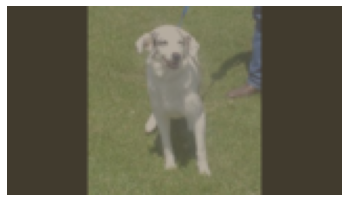

In [144]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


# Run this to test your data loaders
images, labels = next(iter(loader))
imshow(images[0])

In [145]:
import pandas as pd

In [149]:
from glob import glob

paths = glob("datasets/cat_vs_dog/*/*/*")

In [153]:
dictionary = {}
for path in paths:
    image = Image.open(path)
    ratio = np.round(image.width/image.height, 2)
    dictionary[path] = ratio
df = pd.DataFrame(dictionary)

ValueError: If using all scalar values, you must pass an index

In [154]:
dictionary

{'datasets/cat_vs_dog/test/cat/cat.7660.jpg': 1.3,
 'datasets/cat_vs_dog/test/cat/cat.1211.jpg': 1.25,
 'datasets/cat_vs_dog/test/cat/cat.1563.jpg': 1.33,
 'datasets/cat_vs_dog/test/cat/cat.1205.jpg': 1.07,
 'datasets/cat_vs_dog/test/cat/cat.7884.jpg': 0.91,
 'datasets/cat_vs_dog/test/cat/cat.6542.jpg': 1.33,
 'datasets/cat_vs_dog/test/cat/cat.9103.jpg': 0.67,
 'datasets/cat_vs_dog/test/cat/cat.4341.jpg': 0.94,
 'datasets/cat_vs_dog/test/cat/cat.1239.jpg': 1.08,
 'datasets/cat_vs_dog/test/cat/cat.9665.jpg': 1.33,
 'datasets/cat_vs_dog/test/cat/cat.991.jpg': 1.33,
 'datasets/cat_vs_dog/test/cat/cat.2081.jpg': 1.0,
 'datasets/cat_vs_dog/test/cat/cat.5922.jpg': 1.33,
 'datasets/cat_vs_dog/test/cat/cat.7853.jpg': 1.34,
 'datasets/cat_vs_dog/test/cat/cat.5249.jpg': 0.82,
 'datasets/cat_vs_dog/test/cat/cat.4143.jpg': 0.83,
 'datasets/cat_vs_dog/test/cat/cat.4625.jpg': 1.25,
 'datasets/cat_vs_dog/test/cat/cat.6032.jpg': 1.33,
 'datasets/cat_vs_dog/test/cat/cat.11930.jpg': 0.93,
 'datasets/cat

In [ ]:
1.33 50
1.32 20
1.20 10
1.19 10
1.21 10